<a href="https://colab.research.google.com/github/Shakkyra/TC3002B/blob/main/A4_1_DiegoCabrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4.1. Procesos de la vida real como distribuciones de probabilidad

### Diego Sebastián García Cabrera A01634071

Kaggle Dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-space-exploration-dataset-2000-2025/data

### Objetivo
Identificar y entender cuál es la distribución de probabilidad que mejor representa cómo se ha asignado el presupuesto a las misiones espaciales en el sector global de exploración espacial entre los años 2000 y 2025.

In [ ]:
!pip install fitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter

In [10]:
import pandas as pd
df = pd.read_csv('Global_Space_Exploration_Dataset.csv')

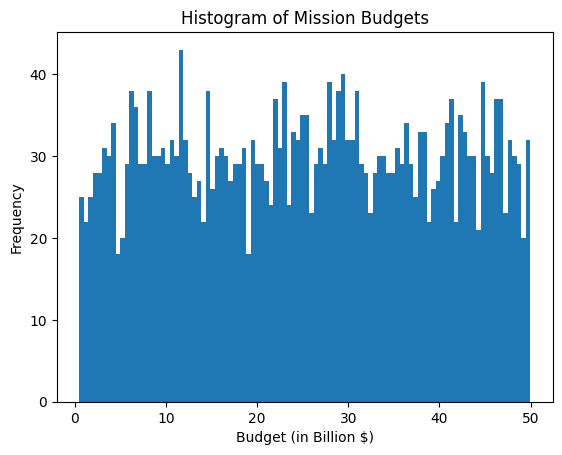

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['Budget (in Billion $)'], bins=100)
plt.xlabel('Budget (in Billion $)')
plt.ylabel('Frequency')
plt.title('Histogram of Mission Budgets')
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rdist,0.001109,786.198594,804.217696,0.014158,0.013062,0.680323
powerlaw,0.001119,786.213402,804.232504,0.014301,0.014494,0.549249
vonmises_line,0.001133,786.247572,804.266675,0.014450,0.011636,0.806768
uniform,0.001147,784.151963,796.164698,0.014693,0.014589,0.540738
gennorm,0.001147,786.151969,804.171072,0.014693,0.499667,0.000000


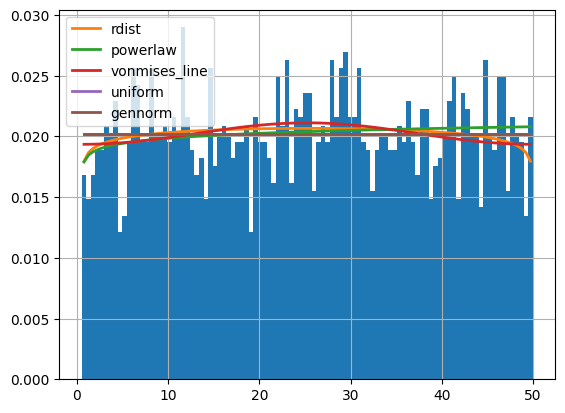

In [15]:
!pip install --upgrade numpy
!pip install --upgrade joblib
from fitter import Fitter

f = Fitter(df['Budget (in Billion $)'])
f.fit()
f.summary()

In [17]:
best_distribution = f.get_best()
distribution_name = list(best_distribution.keys())[0]
parameters = best_distribution[distribution_name]
print(f"Best fitting distribution: {distribution_name}")
print(f"Parameters: {parameters}")

Best fitting distribution: rdist
Parameters: {'c': np.float64(2.0716362915505933), 'loc': np.float64(25.250401087455174), 'scale': np.float64(24.721103013727983)}


## Conclusiones
En este análisis me propuse identificar el modelo estadístico que mejor representa cómo se han asignado los presupuestos a las misiones espaciales a nivel global entre los años 2000 y 2025. Al estudiar los datos, descubrí que los presupuestos siguen una distribución R (rdist), con parámetros que reflejan una concentración de valores en torno a un punto central, pero también la presencia de misiones con presupuestos notablemente elevados.
El parámetro de forma (c ≈ 2.07) indica que, aunque la mayoría de las misiones cuentan con presupuestos dentro de un rango común, existen varios casos atípicos con montos significativamente más altos. El parámetro de ubicación, de aproximadamente 25.25 mil millones de dólares, señala el valor central de la distribución, mientras que el parámetro de escala (24.72) refleja el nivel de dispersión entre los distintos presupuestos.
Comprender esta distribución me permitió ir más allá de una simple observación de los datos. El modelo tiene aplicaciones prácticas: puede ayudar a las agencias espaciales a planear presupuestos más realistas, evaluar riesgos financieros con mayor precisión, detectar anomalías que podrían representar tanto errores como innovaciones, y generar escenarios simulados para la planificación estratégica.